### Exemplo: No nosso caso, vamos ver a performance de uma carteira de ativos. Vamos chamar de carteira do Lira.

- Temos o arquivo 'Carteira.xlsx' com os ativos e suas respectivas quantidades
- Vamos analisar como que os ativos performaram, quanto que rendeu a carteira como um todo e comparar com o IBOV

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

carteira = pd.read_excel('Carteira.xlsx')
carteira.drop(8, inplace=True)
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
9,NTCO3,Ação,100
10,BCRI11,FII,100


### Criando nosso dataframe de Cotações dos ativos da carteira

In [32]:
cotacao_carteira = pd.DataFrame()

for ativo in carteira['Ativos']:
    cotacao_carteira[ativo] = web.DataReader(f'{ativo}.SA', data_source='yahoo', start='2020-01-01', end='2020-11-10')['Adj Close']

display(cotacao_carteira)

### Será que todos os dados vieram corretos?

In [73]:
cotacao_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 2020-01-02 to 2020-11-10
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  215 non-null    float64
 1   SMAL11  215 non-null    float64
 2   MGLU3   215 non-null    float64
 3   BBDC4   215 non-null    float64
 4   ITUB4   215 non-null    float64
 5   ENEV3   215 non-null    float64
 6   MOVI3   215 non-null    float64
 7   BPAC11  215 non-null    float64
 8   NTCO3   215 non-null    float64
 9   BCRI11  215 non-null    float64
 10  VILG11  215 non-null    float64
 11  KNRI11  215 non-null    float64
 12  XPLG11  110 non-null    float64
dtypes: float64(13)
memory usage: 23.5 KB


### Ajustando os dados

In [78]:
cotacao_carteira = cotacao_carteira.ffill()
cotacao_carteira

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029736,25.712975,35.138096,10.9650,17.875835,18.003096,38.093487,118.401840,143.754623,192.262436,122.058310
2020-01-03,113.800003,140.899994,11.922436,25.725988,34.768532,11.0675,18.350576,18.055340,40.747009,119.818642,141.825043,192.262436,122.058310
2020-01-06,112.589996,139.100006,11.932190,25.266464,34.251118,11.3500,18.418331,18.029217,39.882378,118.880356,143.330124,190.701981,122.058310
2020-01-07,112.239998,139.399994,11.898049,24.827524,33.456509,11.2650,18.381567,18.101149,40.528366,119.039864,138.766632,191.443680,122.058310
2020-01-08,111.949997,138.199997,12.263844,24.443462,32.911366,11.2125,18.473478,17.940725,40.737072,116.881813,134.560120,180.607239,122.058310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,94.160004,112.000000,26.143793,15.768745,23.624186,14.4000,17.039715,18.110687,47.375851,100.865334,122.500168,152.557724,122.376312
2020-11-05,96.949997,115.900002,27.401571,16.012753,24.181717,14.6775,18.032320,18.910892,49.969746,100.865334,123.860542,152.365067,122.663895
2020-11-06,97.190002,117.510002,27.281780,15.974628,24.153368,14.7925,18.592957,19.118176,50.317589,100.724602,123.522850,152.615524,124.619446


### Vamos ver como que as ações foram individualmente

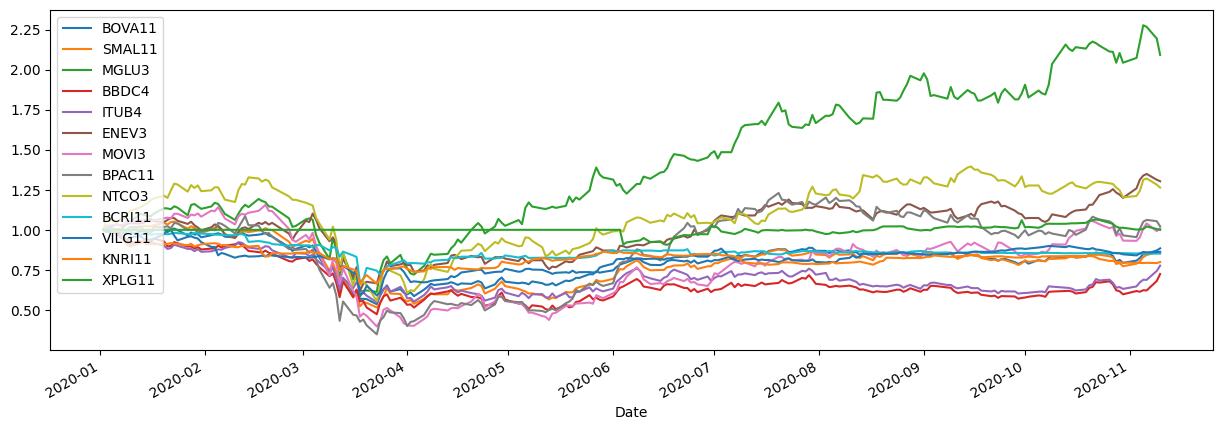

In [81]:
carteira_norm = cotacao_carteira / cotacao_carteira.iloc[0]
carteira_norm.plot(figsize=(15, 5))
plt.legend(loc='upper left')

### Vamos puxar o IBOV para comparar

### Criando um dataframe da Carteira com as quantidades de ações

### Comparação Carteira x IBOV

### Correlação da Carteira com o IBOV